#   Defines a network that can find separate circles of data

### Imports

In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

### Helper functions

In [2]:
# plt a data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

In [3]:
# common function that draws decision boundary
def plot_decision_boundary(model, X, y):
    
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make predication with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    # plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)
    return plt

In [4]:
# Generate some data blobs. Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

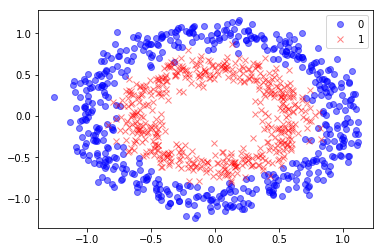

In [5]:
pl = plot_data(plt, X, y)
pl.show()

In [6]:
# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create the keras model

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


### Create Model
### Add Layers
### Compile Model
### Train Model (via fit)
### Evaluate Performance

In [8]:
#   Implement as Functional API
from keras.models import Model
from keras.layers import Input
#
inputs = Input(shape=(2,))
#   Hidden layers
x = Dense(4, activation="tanh",  name="Hidden-1")(inputs)
x = Dense(4, activation="tanh", name="Hidden-2")(x)
#   Output Layer
o = Dense(1, activation="sigmoid", name="Output_layer")(x)
#   Create Model and specify the input and output
model = Model(inputs=inputs, outputs=o)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [10]:
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [11]:
from keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [12]:
#   Define early stopping callback
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

In [13]:
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 443us/step - loss: 0.7026 - acc: 0.5057 - val_loss: 0.6943 - val_acc: 0.4900
Epoch 2/100
700/700 [==============================] - 0s 36us/step - loss: 0.6645 - acc: 0.6071 - val_loss: 0.6292 - val_acc: 0.7867
Epoch 3/100
700/700 [==============================] - 0s 33us/step - loss: 0.6103 - acc: 0.7029 - val_loss: 0.5735 - val_acc: 0.6000
Epoch 4/100
700/700 [==============================] - 0s 31us/step - loss: 0.4774 - acc: 0.8071 - val_loss: 0.4074 - val_acc: 0.8700
Epoch 5/100
700/700 [==============================] - 0s 33us/step - loss: 0.3351 - acc: 0.9000 - val_loss: 0.2870 - val_acc: 0.9200
Epoch 6/100
700/700 [==============================] - 0s 29us/step - loss: 0.2227 - acc: 0.9514 - val_loss: 0.2199 - val_acc: 0.9300
Epoch 7/100
700/700 [==============================] - 0s 33us/step - loss: 0.1620 - acc: 0.9500 - va

In [14]:
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

300/300 [==============================] - 0s 33us/step


Test loss: 0.11840462639927864 Test accuracy: 0.9533333333333334


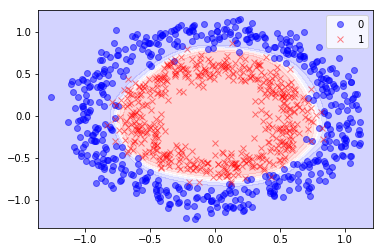

In [15]:
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()